In [ ]:
import os, sys

os.getcwd()

In [ ]:
# Import libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "sectors" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("MCResultCSVs/maxclique_quant_%s_res.csv" % (dataset))
class_res_df = pd.read_csv("MCResultCSVs/maxclique_class_%s_res.csv" % (dataset))

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])
class_res_df = class_res_df.drop(axis=1, columns=['Unnamed: 0'])

In [ ]:
assert quant_res_df.shape == class_res_df.shape and quant_res_df.columns.equals(class_res_df.columns)

In [ ]:
quant_res_df.columns

In [ ]:
# Plot graph density for each threshold. 

thresh_array = quant_res_df['threshold'].unique()

density_distr = []

for thresh in thresh_array:
    density = quant_res_df[quant_res_df.threshold == thresh]['density']
    density_distr.append(density)
    
plt.boxplot(density_distr, labels=thresh_array)
plt.ylabel("Graph Density")
plt.xlabel("Correlation Threshold")
plt.title("%s Density vs Threshold" % (dataset))
plt.show()

In [51]:
quant_res_df['threshold'].unique()[4]

0.7000000000000002

<Figure size 432x288 with 0 Axes>

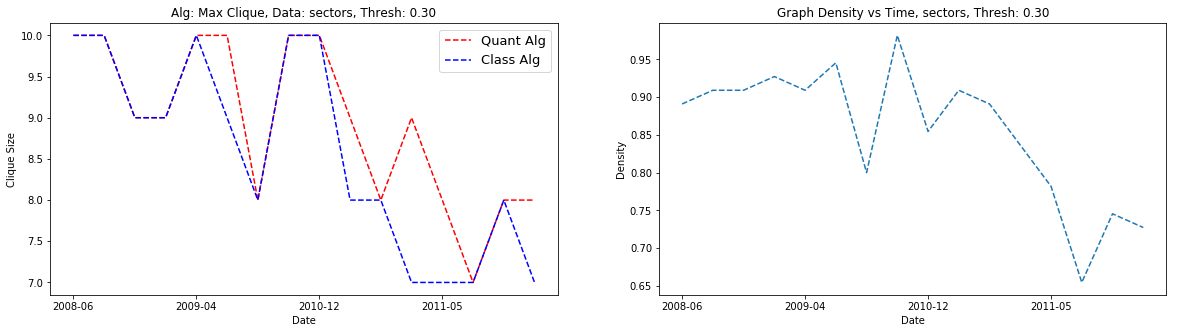

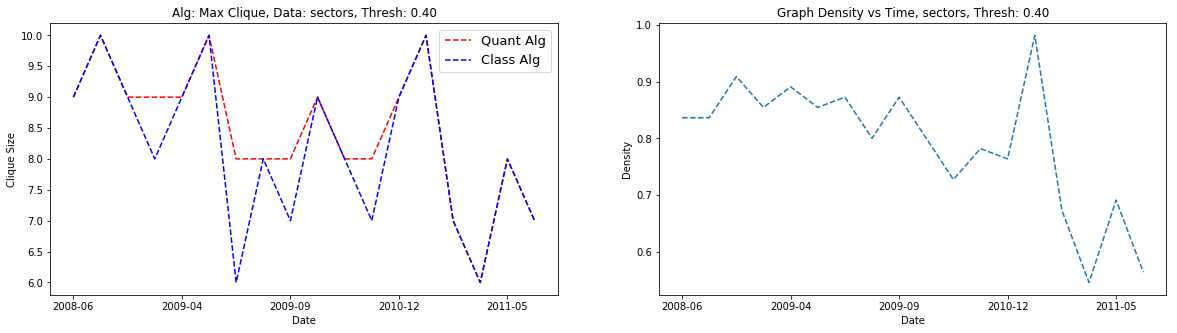

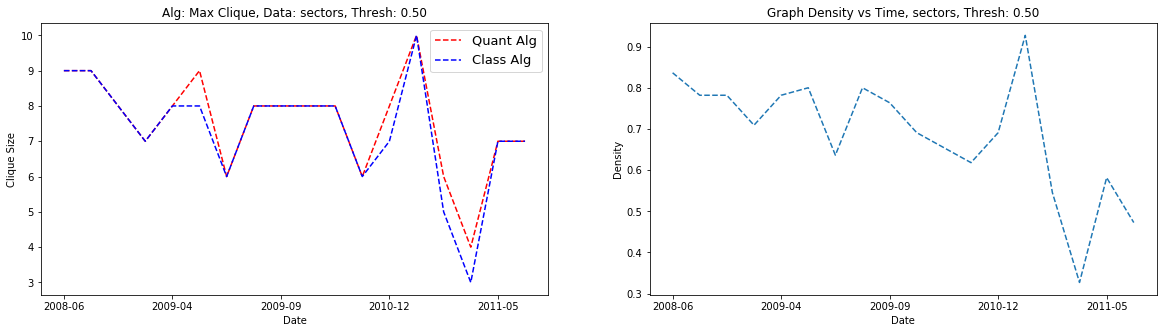

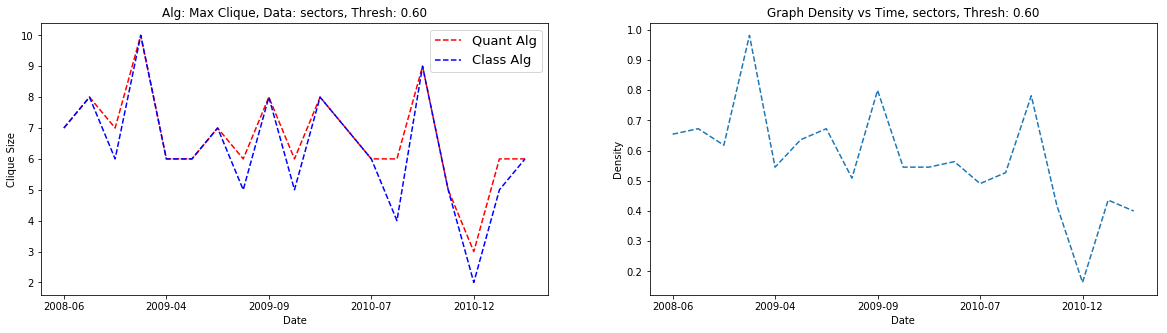

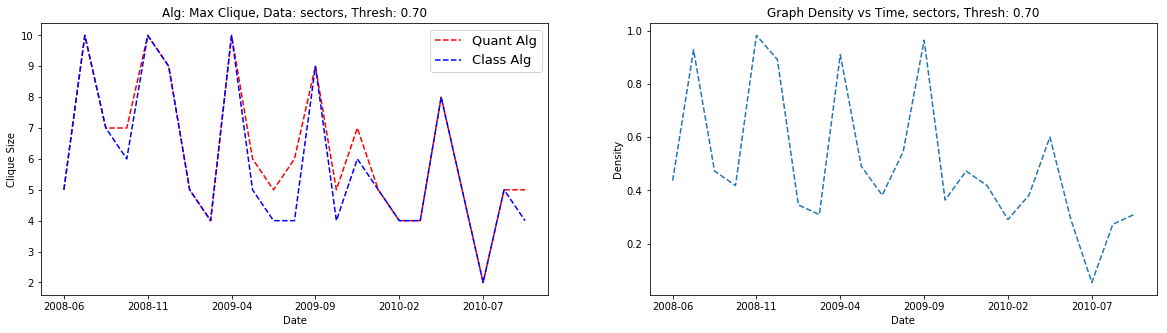

In [44]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & 
                                (quant_res_df.valid_clique == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & 
                                (class_res_df.valid_clique == True)]
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    assert quant_series.shape == class_series.shape
    
    fig = plt.figure(i)
    plt.subplots(figsize=(20,5))
    
    plt.subplot(121)
    plt.title('Alg: Max Clique, Data: %s, Thresh: %.2f' % (dataset, thresh))
    plt.ylabel('Clique Size')
    plt.xlabel('Date')
    
    plt.plot(quant_series["date"], quant_series['clique_size'], 'r--', label='Quant Alg')
    plt.plot(quant_series["date"], class_series['clique_size'], 'b--', label='Class Alg')
    plt.legend(loc=0, prop={'size': 13})
    plt.xticks(ticks=quant_series['date'][::4], 
              labels=[x[0:7] for x in quant_series['date']])
    
    plt.subplot(122)
    plt.title('Graph Density vs Time, %s, Thresh: %.2f' % (dataset, thresh))
    plt.plot(quant_series['date'], quant_series['density'], '--')
    plt.xticks(ticks=quant_series['date'][::4], 
              labels=[x[0:7] for x in quant_series['date']])
    plt.ylabel("Density")
    plt.xlabel("Date")
    
    i += 1

<Figure size 432x288 with 0 Axes>

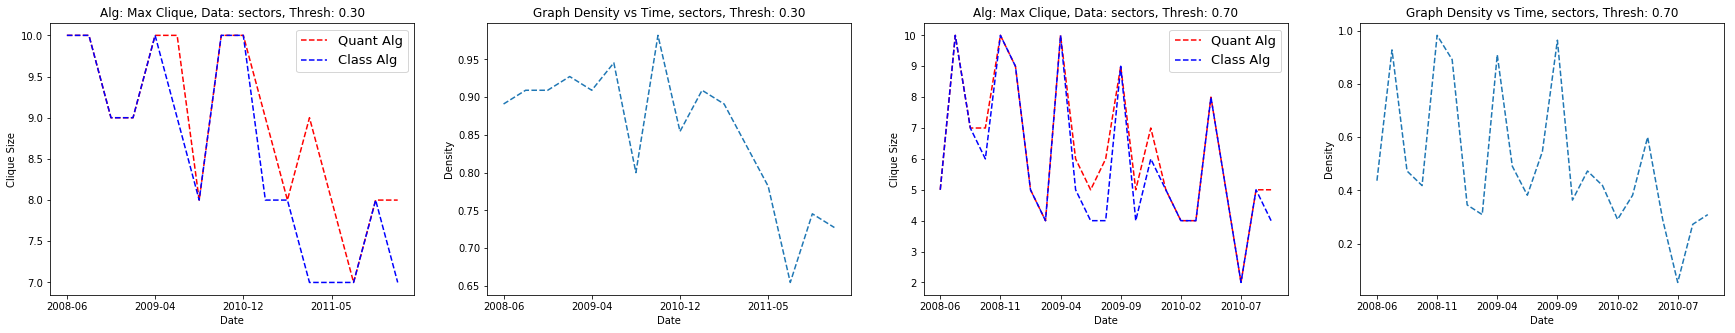

In [59]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()
low_thresh = thresholds[0]
high_thresh = thresholds[4]

quant_series = quant_res_df[(quant_res_df.threshold == 0.3) & 
                            (quant_res_df.valid_clique == True)]
class_series = class_res_df[(class_res_df.threshold == 0.3) & 
                            (class_res_df.valid_clique == True)]
class_series = class_series[class_series['date'].isin(quant_series['date'])]

assert quant_series.shape == class_series.shape

fig = plt.figure(1)
plt.subplots(figsize=(30,5))

plt.subplot(141)
plt.title('Alg: Max Clique, Data: %s, Thresh: %.2f' % (dataset, 0.3))
plt.ylabel('Clique Size')
plt.xlabel('Date')

plt.plot(quant_series["date"], quant_series['clique_size'], 'r--', label='Quant Alg')
plt.plot(quant_series["date"], class_series['clique_size'], 'b--', label='Class Alg')
plt.legend(loc=0, prop={'size': 13})
plt.xticks(ticks=quant_series['date'][::4], 
          labels=[x[0:7] for x in quant_series['date']])

plt.subplot(142)
plt.title('Graph Density vs Time, %s, Thresh: %.2f' % (dataset, 0.3))
plt.plot(quant_series['date'], quant_series['density'], '--')
plt.xticks(ticks=quant_series['date'][::4], 
          labels=[x[0:7] for x in quant_series['date']])
plt.ylabel("Density")
plt.xlabel("Date")


quant_series = quant_res_df[(quant_res_df.threshold == high_thresh) & 
                            (quant_res_df.valid_clique == True)]
class_series = class_res_df[(class_res_df.threshold == high_thresh) & 
                            (class_res_df.valid_clique == True)]
class_series = class_series[class_series['date'].isin(quant_series['date'])]

assert quant_series.shape == class_series.shape

plt.subplot(143)
plt.title('Alg: Max Clique, Data: %s, Thresh: %.2f' % (dataset, 0.7))
plt.ylabel('Clique Size')
plt.xlabel('Date')

plt.plot(quant_series["date"], quant_series['clique_size'], 'r--', label='Quant Alg')
plt.plot(quant_series["date"], class_series['clique_size'], 'b--', label='Class Alg')
plt.legend(loc=0, prop={'size': 13})
plt.xticks(ticks=quant_series['date'][::4], 
          labels=[x[0:7] for x in quant_series['date']])

plt.subplot(144)
plt.title('Graph Density vs Time, %s, Thresh: %.2f' % (dataset, high_thresh))
plt.plot(quant_series['date'], quant_series['density'], '--')
plt.xticks(ticks=quant_series['date'][::4], 
          labels=[x[0:7] for x in quant_series['date']])
plt.ylabel("Density")
plt.xlabel("Date")

plt.savefig('../ReportFiguresPlots/GraphColor/gc_%s_score_density' % (dataset))

In [ ]:
all_quant_df = all_quant_df.groupby(["density"])["set_size"].mean()
all_class_df = all_class_df.groupby(['density'])['set_size'].mean()

In [ ]:
fig = plt.figure(1, figsize=(15,10))
plt.plot(all_quant_df, 'r--', label="Quant. Alg")
plt.plot(all_class_df, 'b--', label="Class. Alg")
plt.title("Max Ind. Set vs Density")
plt.ylabel("Set Size")
plt.xlabel("Density")
plt.legend()
plt.show()
fig.savefig("maxindset_density_all.png")